<a href="https://colab.research.google.com/github/Darwin575/CSE422_Courseworks/blob/main/multiclass_Lariosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gazal5277/e-commerce-product-and-customer-dataset")

print("Path to dataset files:", path)

100%|██████████| 103k/103k [00:00<00:00, 13.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gazal5277/e-commerce-product-and-customer-dataset/versions/1


In [ ]:
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/gazal5277/e-commerce-product-and-customer-dataset/versions/1/refined_ecommerce_product_data.csv', nrows = 1000)

In [ ]:
df

,Product_ID,Product_Name,Category,Sub_Category,Price,Customer_Age,Customer_Gender,Purchase_History,Review_Rating,Review_Sentiment
0,P0001,Sweater,Clothing,Pants,38.44,58,Male,16,2,Negative
1,P0002,Dining Table,Furniture,Chair,408.46,53,Female,4,5,Very Positive
2,P0003,Skincare Cream,Beauty,Hair Care,22.04,54,Male,7,2,Negative
3,P0004,Skincare Cream,Beauty,Makeup,145.24,27,Female,21,4,Neutral
4,P0005,Bluetooth Speaker,Electronics,Headphones,862.61,44,Female,27,5,Very Positive
...,...,...,...,...,...,...,...,...,...,...
995,P0996,Cabinet,Furniture,Chair,790.68,27,Female,13,5,Positive
996,P0997,Soccer Ball,Sports,Yoga Mat,761.22,30,Female,21,5,Very Positive
997,P0998,Basketball,Sports,Football,721.03,46,Male,15,4,Very Positive
998,P0999,Headphones,Electronics,Speakers,1245.13,57,Male,9,5,Very Positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

# Prepare the data
features = ['Price', 'Customer_Age', 'Customer_Gender', 'Purchase_History', 'Review_Rating']
X = pd.get_dummies(df[features], columns=['Customer_Gender'])  # One-hot encode categorical variables
y = df['Review_Sentiment']

# Encode categorical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Store feature names before scaling
feature_names = X_train.columns

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1]))
model.add(Activation('relu'))  # ReLU activation function
model.add(Dense(32))
model.add(Activation('relu'))  # ReLU activation function
model.add(Dense(y_categorical.shape[1]))
model.add(Activation('softmax'))  # Softmax activation function

# Compile the model with metrics=['accuracy']
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3477 - loss: 1.3314 - val_accuracy: 0.4750 - val_loss: 1.1305
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4742 - loss: 1.1058 - val_accuracy: 0.5000 - val_loss: 1.0159
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5013 - loss: 0.9978 - val_accuracy: 0.4875 - val_loss: 0.9411
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5654 - loss: 0.9299 - val_accuracy: 0.5375 - val_loss: 0.8870
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5101 - loss: 0.9055 - val_accuracy: 0.5500 - val_loss: 0.8577
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5578 - loss: 0.8463 - val_accuracy: 0.5375 - val_loss: 0.8313
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5724 - loss: 0.8350 - val_accuracy: 0.5250 - val_loss: 0.8185
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5831 - loss: 0.8296 - val_accuracy: 0.5250 - val_loss: 0.8086
Ep

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

from sklearn.metrics import classification_report

# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4869 - loss: 0.8602
Test Loss: 0.8442
Test Accuracy: 0.5050
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
               precision    recall  f1-score   support

     Negative       0.75      0.23      0.35        13
      Neutral       0.42      0.46      0.44        41
     Positive       0.45      0.51      0.48        79
Very Positive       0.63      0.58      0.60        67

     accuracy                           0.51       200
    macro avg       0.56      0.45      0.47       200
 weighted avg       0.52      0.51      0.50       200



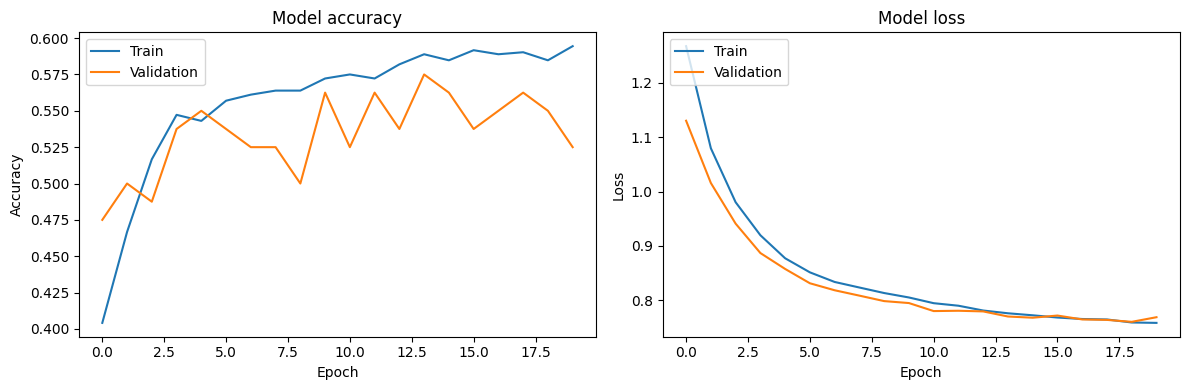

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
def predict_product_sentiment(price, age, gender, purchase_history, review_rating):
    # Prepare input data
    input_data = pd.DataFrame([[price, age, gender, purchase_history, review_rating]],
                              columns=['Price', 'Customer_Age', 'Customer_Gender', 'Purchase_History', 'Review_Rating'])

    # Ensure consistent feature names
    input_data = pd.get_dummies(input_data, columns=['Customer_Gender'])

    # Add missing columns
    for col in feature_names:
        if col not in input_data.columns:
            input_data[col] = 0

    # Reorder columns to match the training set
    input_data = input_data[feature_names]

    input_data = scaler.transform(input_data)

    # Predict sentiment
    prediction = model.predict(input_data)
    sentiment = label_encoder.inverse_transform(np.argmax(prediction, axis=1))
    return sentiment[0]

# Example user input
price = 100.0
age = 30
gender = 'Male'  # or 'Female'
purchase_history = 10
review_rating = 4

# Get the prediction
predicted_sentiment = predict_product_sentiment(price, age, gender, purchase_history, review_rating)
print(f'The predicted review sentiment is: {predicted_sentiment}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The predicted review sentiment is: Positive
